### Case study #03 - Correlation and Regression
     A textile company regularly spent money on five advertising companies for their
     ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount
spent for advertising through five different companies and profit
generated.
2. Build a regression model to predict the profit from the given data and
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the
following amount for advertisement.
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298
Add5(in Thousands) 320

In [1]:
# importing the libraries
import pandas as pd              
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data into the python

In [2]:
data = pd.read_csv("Add_sales_data_2018.csv")

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


### Understanding the data

In [4]:
data.shape

(205, 7)

In [5]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB



 #####  1.Dataset contains 205 rows and 7 columns
 #####  2.Dataset contains no null values
 #####  3.Dataset contains two types of data ,float64 and object
   

<function matplotlib.pyplot.show(close=None, block=None)>

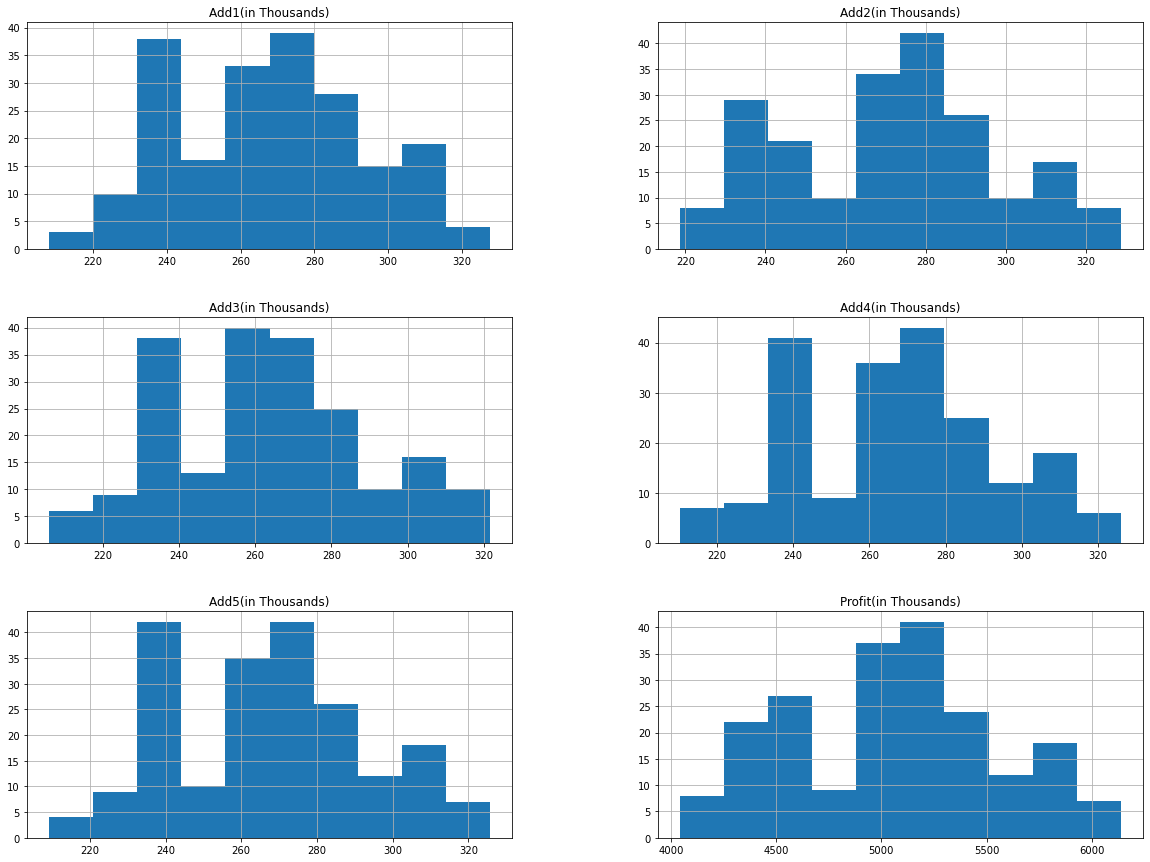

In [7]:
freqgraph = data.select_dtypes(include=['int64','float64','object'])
freqgraph.hist(figsize=(20,15))
plt.show

### 1. Check whether there is any relationship between the amount spent for advertising through five different      companies and profit generated.

<AxesSubplot:>

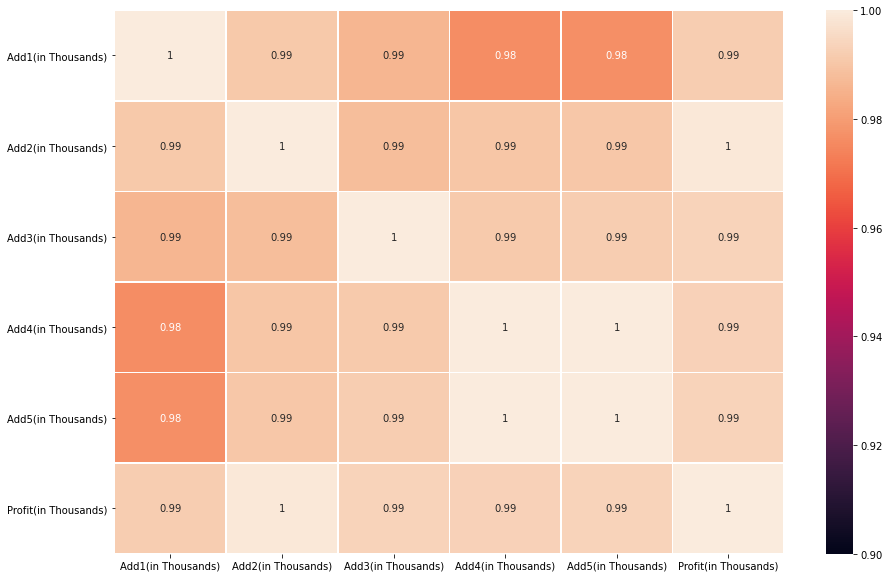

In [8]:
#to find the correlation between the variables
corrmatrix = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmax=1,vmin=0.9,annot=True,linewidth=0.5)

#### Inference
###### There is a very strong positive correlation between the amount spent for advertising through five different companies and profit generated

### 2.Build a regression model to predict the profit from the given data and comment your findings on it.

In [9]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [10]:
#Removing columns with high positive correlation
data1 = data.drop(['Date'],axis=1)

In [11]:
data1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [12]:
#Splitting the data into independent variable and dependent variable
X=data1.drop(['Profit(in Thousands)'],axis=1)
Y=data1['Profit(in Thousands)']

In [13]:
X.shape

(205, 5)

In [14]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=34,test_size=0.25)

In [15]:
#to create linear regression model
from sklearn import linear_model

In [16]:
linear_reg = linear_model.LinearRegression()
model = linear_reg.fit(X_train,Y_train)

In [17]:
predictions = model.predict(X_test)

In [18]:
print(Y_test)

47     4519.061
193    5745.806
83     4980.446
151    5146.949
144    5111.806
91     4836.837
125    5153.977
40     4486.996
26     4451.999
53     4605.783
10     4411.775
134    4934.682
188    5880.541
169    5730.999
147    5175.051
104    5518.561
165    5107.437
162    5328.025
93     4705.198
167    5465.277
123    5238.366
178    6062.457
3      4391.665
76     5225.140
79     5013.207
192    5767.839
14     4379.901
86     5015.536
131    4968.030
30     4598.292
50     4548.110
145    5108.626
24     4435.174
127    5188.139
200    5374.105
110    5511.087
133    4821.542
111    5491.792
176    5858.340
142    5163.322
71     4916.064
203    5565.444
204    5421.842
52     4494.144
2      4213.819
46     4558.651
82     5034.726
158    5312.740
160    5387.438
87     5058.140
7      4470.775
55     4760.877
Name: Profit(in Thousands), dtype: float64


In [19]:
print(predictions)

[4519.061 5745.806 4980.446 5146.949 5111.806 4836.837 5153.977 4486.996
 4451.999 4605.783 4411.775 4934.682 5880.541 5730.999 5175.051 5518.561
 5107.437 5328.025 4705.198 5465.277 5238.366 6062.457 4391.665 5225.14
 5013.207 5767.839 4379.901 5015.536 4968.03  4598.292 4548.11  5108.626
 4435.174 5188.139 5374.105 5511.087 4821.542 5491.792 5858.34  5163.322
 4916.064 5565.444 5421.842 4494.144 4213.819 4558.651 5034.726 5312.74
 5387.438 5058.14  4470.775 4760.877]


In [20]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(Y_test,predictions))

MSE is 4.772195841652082e-25


MSE is approximately equal to zero so the accuracy of the model is approximately 100%

In [21]:
accuracy = (sum(predictions)/sum(Y_test))*100
accuracy

100.0

### 3.Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

###### Add1(in Thousands) 290 
###### Add2(in Thousands) 312
#####   Add3(in Thousands) 309 
#####    Add4(in Thousands) 298 
#####    Add5(in Thousands) 320


In [22]:
X.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90


In [23]:
#predicting the profit generated by the company
make_pred = [[290,312,309,298,320]]
model.predict(make_pred).item()

5820.0599999999995